In [1]:
import os

def load_casia_b_data(dataset_path):
    """
    Load CASIA-B dataset and split into training and testing lists using the
    standard protocol:
      - Training: Subjects 001-074
      - Testing:  Subjects 075-124

    Returns:
      train_data: List of dicts for each training sequence
      test_data:  List of dicts for each testing sequence
    """
    # Define subjects
    train_subjects = [f"{i:03d}" for i in range(1, 85)]   
    test_subjects  = [f"{i:03d}" for i in range(85, 125)] 

    # Define conditions and sequences
    conditions = {
        'nm': ['nm-01','nm-02','nm-03','nm-04','nm-05','nm-06'],
        'bg': ['bg-01','bg-02'],
        'cl': ['cl-01','cl-02']
    }
    # Define views (0° to 180° in 18° steps)
    views = [f"{i:03d}" for i in range(0, 181, 18)]

    # Helper to gather data entries
    def gather_entries(subject_list):
        entries = []
        for subject in subject_list:
            subj_path = os.path.join(dataset_path, subject)
            if not os.path.isdir(subj_path):
                continue
            for cond, seqs in conditions.items():
                for seq in seqs:
                    seq_path = os.path.join(subj_path, seq)
                    if not os.path.isdir(seq_path):
                        continue
                    for view in views:
                        view_path = os.path.join(seq_path, view)
                        if not os.path.isdir(view_path):
                            continue
                        # Count PNG frames
                        frames = [f for f in os.listdir(view_path) if f.endswith('.png')]
                        entries.append({
                            'subject': subject,
                            'condition': cond,
                            'sequence': seq,
                            'view': view,
                            'path': view_path,
                            'num_frames': len(frames)
                        })
        return entries

    # Gather train and test data
    train_data = gather_entries(train_subjects)
    test_data  = gather_entries(test_subjects)

    print(f"Loaded {len(train_data)} training sequences from {len(train_subjects)} subjects")
    print(f"Loaded {len(test_data)} testing sequences from {len(test_subjects)} subjects")

    return train_data, test_data

# Example usage:
# train_data, test_data = load_casia_b_data('/path/to/CASIA-B-extracted')


In [2]:
train_data, test_data = load_casia_b_data(r'D:\vit study\Machine Learning\Gait\CASIA - B\CASIA - B\GaitDatasetB-silh\GaitDatasetB-silh\GaitDatasetB-silh')

Loaded 9130 training sequences from 84 subjects
Loaded 4400 testing sequences from 40 subjects


In [3]:
train_data[0]

{'subject': '001',
 'condition': 'nm',
 'sequence': 'nm-01',
 'view': '000',
 'path': 'D:\\vit study\\Machine Learning\\Gait\\CASIA - B\\CASIA - B\\GaitDatasetB-silh\\GaitDatasetB-silh\\GaitDatasetB-silh\\001\\nm-01\\000',
 'num_frames': 96}

In [4]:
import pandas as pd

# Convert to DataFrame for easy analysis
train_df = pd.DataFrame(train_data)
test_df  = pd.DataFrame(test_data)

# 1. Number of sequences per condition
print("Train sequences per condition:")
print(train_df['condition'].value_counts(), "\n")

print("Test sequences per condition:")
print(test_df['condition'].value_counts(), "\n")


Train sequences per condition:
condition
nm    5478
bg    1826
cl    1826
Name: count, dtype: int64 

Test sequences per condition:
condition
nm    2640
bg     880
cl     880
Name: count, dtype: int64 



In [5]:

stats = train_df.groupby(['condition','view'])['num_frames'].agg(['count']).unstack(fill_value=0)
print("\nTrain sequences and mean lengths by condition & view:\n", stats)



Train sequences and mean lengths by condition & view:
           count                                                  
view        000  018  036  054  072  090  108  126  144  162  180
condition                                                        
bg          166  166  166  166  166  166  166  166  166  166  166
cl          166  166  166  166  166  166  166  166  166  166  166
nm          498  498  498  498  498  498  498  498  498  498  498


In [6]:
classes=train_df["subject"].unique()
classes

array(['001', '002', '003', '004', '006', '007', '008', '009', '010',
       '011', '012', '013', '014', '015', '016', '017', '018', '019',
       '020', '021', '022', '023', '024', '025', '026', '027', '028',
       '029', '030', '031', '032', '033', '034', '035', '036', '037',
       '038', '039', '040', '041', '042', '043', '044', '045', '046',
       '047', '048', '049', '050', '051', '052', '053', '054', '055',
       '056', '057', '058', '059', '060', '061', '062', '063', '064',
       '065', '066', '067', '068', '069', '070', '071', '072', '073',
       '074', '075', '076', '077', '078', '079', '080', '081', '082',
       '083', '084'], dtype=object)

In [7]:
train_df["sequence"].unique()


array(['nm-01', 'nm-02', 'nm-03', 'nm-04', 'nm-05', 'nm-06', 'bg-01',
       'bg-02', 'cl-01', 'cl-02'], dtype=object)

In [8]:
lengths = [len(os.listdir(ent['path'])) for ent in train_data]
print(min(lengths), max(lengths))


0 204


In [9]:
# List entries with zero frames
empty_train = [e for e in train_data if e['num_frames'] <= 10]
empty_test  = [e for e in test_data  if e['num_frames'] <= 10]

print(f"Empty training sequences: {len(empty_train)}")
for e in empty_train:
    print(f"Subject {e['subject']}, Condition {e['condition']}, Sequence {e['sequence']}, View {e['view']}")

print(f"\nEmpty testing sequences: {len(empty_test)}")
for e in empty_test:
    print(f"Subject {e['subject']}, Condition {e['condition']}, Sequence {e['sequence']}, View {e['view']}")


Empty training sequences: 47
Subject 026, Condition cl, Sequence cl-02, View 162
Subject 037, Condition bg, Sequence bg-01, View 018
Subject 037, Condition bg, Sequence bg-01, View 126
Subject 037, Condition bg, Sequence bg-01, View 144
Subject 037, Condition bg, Sequence bg-01, View 162
Subject 037, Condition bg, Sequence bg-01, View 180
Subject 037, Condition bg, Sequence bg-02, View 018
Subject 037, Condition bg, Sequence bg-02, View 036
Subject 037, Condition bg, Sequence bg-02, View 054
Subject 037, Condition bg, Sequence bg-02, View 126
Subject 037, Condition bg, Sequence bg-02, View 162
Subject 048, Condition bg, Sequence bg-02, View 018
Subject 048, Condition cl, Sequence cl-01, View 018
Subject 048, Condition cl, Sequence cl-01, View 036
Subject 048, Condition cl, Sequence cl-01, View 162
Subject 048, Condition cl, Sequence cl-02, View 018
Subject 048, Condition cl, Sequence cl-02, View 036
Subject 048, Condition cl, Sequence cl-02, View 054
Subject 048, Condition cl, Sequence

In [10]:
MIN_SEQ_LEN = 10

# Filter training data
filtered_train = []
for e in train_data:
    if e['num_frames'] >= MIN_SEQ_LEN:
        filtered_train.append(e)

# Filter testing data
filtered_test = []
for e in test_data:
    if e['num_frames'] >= MIN_SEQ_LEN:
        filtered_test.append(e)

# Update the original lists
train_data = filtered_train
test_data = filtered_test

print(f"Training sequences after filtering: {len(train_data)}")
print(f"Testing sequences after filtering: {len(test_data)}")


Training sequences after filtering: 9083
Testing sequences after filtering: 4378


1870
Subject: 019, Condition: nm, Sequence: nm-01, View: 000, Number of frames: 106


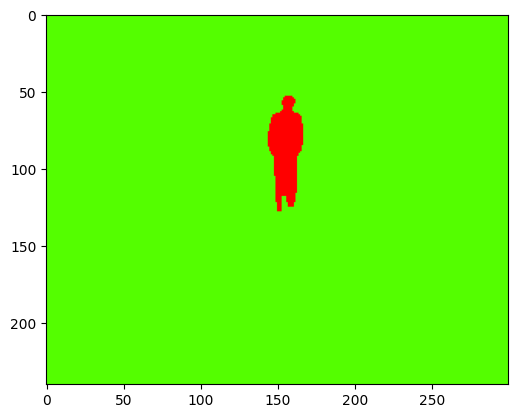

In [11]:
import matplotlib.pyplot as plt
import os
import math
import random

rand_num = random.choice(range(len(train_data)))
print(rand_num)
sample=train_data[rand_num]
sample_path=sample["path"]
sample_frames=os.listdir(sample_path)
image=plt.imread(os.path.join(sample_path,random.choice(sample_frames)))
print(f"Subject: {sample['subject']}, Condition: {sample['condition']}, Sequence: {sample['sequence']}, View: {sample['view']}, Number of frames: {sample['num_frames']}")  
plt.imshow(image, cmap='prism_r')


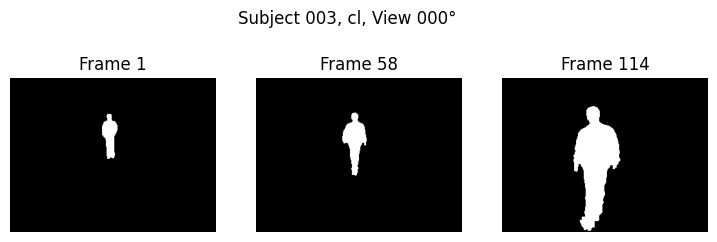

In [12]:
import matplotlib.pyplot as plt
import os

# Pick the first training sequence
rand_num = random.choice(range(len(train_data)))
sample = train_data[rand_num]
frame_files = sorted(f for f in os.listdir(sample['path']) if f.endswith('.png'))

# Select three frames evenly spaced through the sequence
indices = [0, len(frame_files)//2, len(frame_files)-1]
selected = [frame_files[i] for i in indices]

# Load and plot
plt.figure(figsize=(9, 3))
for i, fname in enumerate(selected):
    img = plt.imread(os.path.join(sample['path'], fname))
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Frame {indices[i]+1}")
plt.suptitle(f"Subject {sample['subject']}, {sample['condition']}, View {sample['view']}°")
plt.show()


In [13]:
import numpy as np
import tensorflow as tf

IMG_HEIGHT = 64
IMG_WIDTH  = 44

def preprocess_frame(image_path):
    """
    Reads an image file, decodes, resizes, and normalizes it.
    """
    # Read & decode
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=1)            # grayscale
    # Resize
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    # Normalize to [0,1]
    image = image / 255.0
    return image


In [14]:
preprocess_frame(os.path.join(sample_path, sample_frames[0]))

<tf.Tensor: shape=(64, 44, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], shape=(64, 44, 1), dtype=float32)>

In [15]:
def create_gei_from_sequence(sequence_path):
    import cv2
    frame_files = sorted([f for f in os.listdir(sequence_path) if f.endswith('.png')])
    
    gei = None
    frame_count = 0
    
    for frame_file in frame_files:
        frame_path = os.path.join(sequence_path, frame_file)
        frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        
        if gei is None:
            gei = np.zeros_like(frame, dtype=np.float32)
        
        gei += frame.astype(np.float32) / 255.0
        frame_count += 1
    
    if frame_count > 0:
        gei = gei / frame_count
    
    return (gei * 255).astype(np.uint8)


In [16]:
CACHE_DIR = "gei_cache"
import cv2
os.makedirs(CACHE_DIR, exist_ok=True)

def get_or_create_gei(sequence_path, subject, condition, view):
    """Load GEI from cache or compute & cache it."""
    cache_name = f"{subject}_{condition}_{view}.npy"
    cache_path = os.path.join(CACHE_DIR, cache_name)
    if os.path.exists(cache_path):
        return np.load(cache_path)
    gei = create_gei_from_sequence(sequence_path)
    # Resize & normalize once here
    gei = cv2.resize(gei, (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
    np.save(cache_path, gei)
    return gei


In [17]:
import os
import numpy as np
import cv2

CACHE_DIR = "gei_cache"
os.makedirs(CACHE_DIR, exist_ok=True)

def create_gei_from_sequence(sequence_path):
    frame_files = sorted([f for f in os.listdir(sequence_path) if f.endswith('.png')])
    gei = None
    frame_count = 0
    for frame_file in frame_files:
        frame = cv2.imread(os.path.join(sequence_path, frame_file), cv2.IMREAD_GRAYSCALE)
        if gei is None:
            gei = np.zeros_like(frame, dtype=np.float32)
        gei += frame.astype(np.float32) / 255.0
        frame_count += 1
    if frame_count > 0:
        gei /= frame_count
    return (gei * 255).astype(np.uint8)

def cache_one(ent):
    cache_name = f"{ent['subject']}_{ent['condition']}_{ent['view']}.npy"
    cache_path = os.path.join(CACHE_DIR, cache_name)
    if os.path.exists(cache_path):
        print(f"[SKIP] {cache_name}")
        return
    print(f"[START] {cache_name}")
    gei = create_gei_from_sequence(ent['path'])
    gei = cv2.resize(gei, (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
    np.save(cache_path, gei)
    print(f"[DONE ] {cache_name}")

def get_or_create_gei(sequence_path, subject, condition, view):
    cache_name = f"{subject}_{condition}_{view}.npy"
    cache_path = os.path.join(CACHE_DIR, cache_name)
    if os.path.exists(cache_path):
        return np.load(cache_path)
    cache_one({'path': sequence_path, 'subject': subject, 'condition': condition, 'view': view})
    return np.load(cache_path)

def build_dataset(entries):
    X_list, y_list = [], []
    for ent in entries:
        cache_one(ent)
        gei = get_or_create_gei(ent['path'], ent['subject'], ent['condition'], ent['view'])
        X_list.append(gei)
        y_list.append(int(ent['subject']) - 1)
    X = np.stack(X_list, axis=0)[..., None]  # (N, H, W, 1)
    y = np.array(y_list, dtype=np.int32)
    return X, y

# ==== Main ====
# 1. Cache all GEIs sequentially
all_entries = train_data + test_data
print(f"Caching {len(all_entries)} sequences…")
for ent in all_entries:
    cache_one(ent)

# 2. Build datasets by loading cached GEIs
X_train, y_train = build_dataset(train_data)
X_test, y_test   = build_dataset(test_data)

print("Done building datasets.")
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Caching 13461 sequences…
[START] 001_nm_000.npy
[DONE ] 001_nm_000.npy
[START] 001_nm_018.npy
[DONE ] 001_nm_018.npy
[START] 001_nm_036.npy
[DONE ] 001_nm_036.npy
[START] 001_nm_054.npy
[DONE ] 001_nm_054.npy
[START] 001_nm_072.npy
[DONE ] 001_nm_072.npy
[START] 001_nm_090.npy
[DONE ] 001_nm_090.npy
[START] 001_nm_108.npy
[DONE ] 001_nm_108.npy
[START] 001_nm_126.npy
[DONE ] 001_nm_126.npy
[START] 001_nm_144.npy
[DONE ] 001_nm_144.npy
[START] 001_nm_162.npy
[DONE ] 001_nm_162.npy
[START] 001_nm_180.npy
[DONE ] 001_nm_180.npy
[SKIP] 001_nm_000.npy
[SKIP] 001_nm_018.npy
[SKIP] 001_nm_036.npy
[SKIP] 001_nm_054.npy
[SKIP] 001_nm_072.npy
[SKIP] 001_nm_090.npy
[SKIP] 001_nm_108.npy
[SKIP] 001_nm_126.npy
[SKIP] 001_nm_144.npy
[SKIP] 001_nm_162.npy
[SKIP] 001_nm_180.npy
[SKIP] 001_nm_000.npy
[SKIP] 001_nm_018.npy
[SKIP] 001_nm_036.npy
[SKIP] 001_nm_054.npy
[SKIP] 001_nm_072.npy
[SKIP] 001_nm_090.npy
[SKIP] 001_nm_108.npy
[SKIP] 001_nm_126.npy
[SKIP] 001_nm_144.npy
[SKIP] 001_nm_162.npy
[SKIP] 

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Shapes
print("X_train shape:", X_train.shape)  # (N, SEQ_LEN, 64, 44, 1)
print("y_train shape:", y_train.shape)
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Sequence length: {X_train.shape[1]}")
print(f"Image size: {X_train.shape[2]} x {X_train.shape[3]}")
print(f"Number of unique subjects: {len(np.unique(y_train))}")

# Unique subjects in train
unique, counts = np.unique(y_train, return_counts=True)
print("Subjects:", unique)
print("Sequences per subject:", counts)




In [ ]:
import random

# Pick a random sequence and show five frames
i = random.randint(0, X_train.shape[0] - 1)
# Plot GEI of a random sample
gei = X_train[i, :, :, 0]  # shape: (H, W)
plt.figure(figsize=(4,4))
plt.imshow(gei, cmap='gray')
plt.title(f"GEI - Subject {y_train[i]}")
plt.axis('off')
plt.show()



In [ ]:
import numpy as np

# Save training data
np.save('processed_gei/X_train.npy', X_train)
np.save('processed_gei/y_train.npy', y_train)

# Save testing data
np.save('processed_gei/X_test.npy', X_test)
np.save('processed_gei/y_test.npy', y_test)


In [ ]:
import numpy as np

# Load training data
X_train = np.load('processed_gei/X_train.npy')
y_train = np.load('processed_gei/y_train.npy')

# Load testing data
X_test = np.load('processed_gei/X_test.npy')
y_test = np.load('processed_gei/y_test.npy')

print("Shapes after loading:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision 

In [ ]:
mixed_precision.global_policy() # should output "mixed_float16" (if your GPU is compatible with mixed precision)

In [ ]:
import numpy as np

all_labels = np.concatenate([y_train, y_test])
num_classes = len(np.unique(all_labels))
print(f"Number of unique subjects (classes): {num_classes}")


In [ ]:
import tensorflow as tf

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)
y_test_onehot

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

HEIGHT = X_train.shape[2]
WIDTH = X_train.shape[3]


model = models.Sequential([
    # Regular CNN layers (no TimeDistributed)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set training parameters
BATCH_SIZE = 4
EPOCHS = 10

# Callbacks for better training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
]

# Train the model
print("Starting training...")
history = model.fit(
    X_train, y_train_onehot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test, y_test_onehot),
    callbacks=callbacks,
    verbose=1
)

print("Training completed!")
